# ©All rights reserved by **Showaib bin Nasir** - https://showaibbinnasirportfolio.netlify.app/

***Installing netCDF4 for utilizing netCDF***

In [1]:
!pip install netCDF4


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 31.1 MB/s eta 0:00:00


***Importing Dataset from netCDF4***

In [1]:
from netCDF4 import Dataset


***Defining path of original file***

In [2]:
file_path = '/content/chirps-v2.0.annual.nc' #netCDF file link
nc_file = Dataset(file_path, mode='r')


***Checking the structure of the file***

In [3]:
print(nc_file)

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.6
    title: CHIRPS Version 2.0
    history: created by Climate Hazards Group
    version: Version 2.0
    date_created: 2024-01-11
    creator_name: Pete Peterson
    creator_email: pete@geog.ucsb.edu
    institution: Climate Hazards Group.  University of California at Santa Barbara
    documentation: http://pubs.usgs.gov/ds/832/
    reference: Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros, D.H., Verdin, J.P., Rowland, J.D., Romero, B.E., Husak, G.J., Michaelsen, J.C., and Verdin, A.P., 2014, A quasi-global precipitation time series for drought monitoring: U.S. Geological Survey Data Series 832, 4 p., http://dx.doi.org/110.3133/ds832. 
    comments:  time variable denotes the first day of the given year.
    acknowledgements: The Climate Hazards Group InfraRed Precipitation with Stations development process was carried out through U.S. Geological Survey (USGS) cooperative agreeme

***Checking dimensions and variables***

In [4]:
print(nc_file.dimensions.keys())

dict_keys(['longitude', 'latitude', 'time'])


In [5]:
print(nc_file.variables.keys())

dict_keys(['latitude', 'longitude', 'precip', 'time'])


***Checking weather the coordinates of chittagong is exist or not***

In [6]:
import numpy as np
latitude = nc_file.variables['latitude'][:]
longitude = nc_file.variables['longitude'][:]

# Define the city's coordinates (Chittagong, Bangladesh)
city_lat = 22.3569
city_lon = 91.7832
lat_exists = np.any(np.isclose(latitude, city_lat, atol=0.1))
lon_exists = np.any(np.isclose(longitude, city_lon, atol=0.1))
if lat_exists and lon_exists:
    print("Chittagong exists in the dataset!")
else:
    print("Chittagong does not exist in the dataset.")


Chittagong exists in the dataset!


***Finding the yearly data from precipitations***

In [7]:
import numpy as np
precip = nc_file.variables['precip'][:]
time = nc_file.variables['time'][:]
lat_idx = np.argmin(np.abs(latitude - city_lat))
lon_idx = np.argmin(np.abs(longitude - city_lon))
city_precip = precip[:, lat_idx, lon_idx]
print(f"Yearly precipitation for Chittagong (Lat: {latitude[lat_idx]}, Lon: {longitude[lon_idx]}):")
for t, precip_value in enumerate(city_precip):
    print(f"Year {t + 1}: Precipitation = {precip_value} mm/year")


Yearly precipitation for Chittagong (Lat: 22.375, Lon: 91.77499389648438):
Year 1: Precipitation = 2958.538818359375 mm/year
Year 2: Precipitation = 2888.331298828125 mm/year
Year 3: Precipitation = 3454.39208984375 mm/year
Year 4: Precipitation = 3280.471435546875 mm/year
Year 5: Precipitation = 2819.4814453125 mm/year
Year 6: Precipitation = 2842.270263671875 mm/year
Year 7: Precipitation = 3061.319580078125 mm/year
Year 8: Precipitation = 3311.30517578125 mm/year
Year 9: Precipitation = 2458.58544921875 mm/year
Year 10: Precipitation = 2671.96484375 mm/year
Year 11: Precipitation = 2568.026123046875 mm/year
Year 12: Precipitation = 2557.381103515625 mm/year
Year 13: Precipitation = 3134.93212890625 mm/year
Year 14: Precipitation = 2632.046875 mm/year
Year 15: Precipitation = 3193.55810546875 mm/year
Year 16: Precipitation = 2786.989013671875 mm/year
Year 17: Precipitation = 3355.35400390625 mm/year
Year 18: Precipitation = 2791.165283203125 mm/year
Year 19: Precipitation = 3198.6276

***Adjusting with calender time***

In [8]:
from datetime import datetime, timedelta
time_units = nc_file.variables['time'].units
print(f"Time units: {time_units}")
base_date = datetime.strptime(time_units.split('since')[1].strip(), "%Y-%m-%d %H:%M:%S")
dates = [base_date + timedelta(days=int(t)) for t in time]
print(f"Yearly precipitation for Chittagong:")
for date, precip_value in zip(dates, city_precip):
    print(f"Year {date.year} : Precipitation = {precip_value} mm/year")


Time units: days since 1980-1-1 0:0:0
Yearly precipitation for Chittagong:
Year 1981 : Precipitation = 2958.538818359375 mm/year
Year 1982 : Precipitation = 2888.331298828125 mm/year
Year 1983 : Precipitation = 3454.39208984375 mm/year
Year 1984 : Precipitation = 3280.471435546875 mm/year
Year 1985 : Precipitation = 2819.4814453125 mm/year
Year 1986 : Precipitation = 2842.270263671875 mm/year
Year 1987 : Precipitation = 3061.319580078125 mm/year
Year 1988 : Precipitation = 3311.30517578125 mm/year
Year 1989 : Precipitation = 2458.58544921875 mm/year
Year 1990 : Precipitation = 2671.96484375 mm/year
Year 1991 : Precipitation = 2568.026123046875 mm/year
Year 1992 : Precipitation = 2557.381103515625 mm/year
Year 1993 : Precipitation = 3134.93212890625 mm/year
Year 1994 : Precipitation = 2632.046875 mm/year
Year 1995 : Precipitation = 3193.55810546875 mm/year
Year 1996 : Precipitation = 2786.989013671875 mm/year
Year 1997 : Precipitation = 3355.35400390625 mm/year
Year 1998 : Precipitation

***Converting the year data of Chittagong city to CSV file and visualizing data***

    Year  Precipitation (mm/year)
0   1981              2958.538818
1   1982              2888.331299
2   1983              3454.392090
3   1984              3280.471436
4   1985              2819.481445
5   1986              2842.270264
6   1987              3061.319580
7   1988              3311.305176
8   1989              2458.585449
9   1990              2671.964844
10  1991              2568.026123
11  1992              2557.381104
12  1993              3134.932129
13  1994              2632.046875
14  1995              3193.558105
15  1996              2786.989014
16  1997              3355.354004
17  1998              2791.165283
18  1999              3198.627686
19  2000              3098.869873
20  2001              3015.612793
21  2002              2977.432861
22  2003              2769.923584
23  2004              2916.143311
24  2005              2416.977051
25  2006              2498.962402
26  2007              3426.435059
27  2008              2725.568604
28  2009      

<Figure size 1500x800 with 0 Axes>

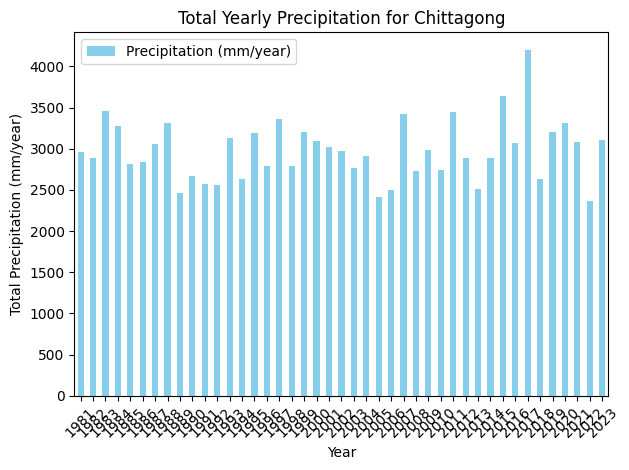

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

data = []
for t in range(len(time)):
    year = (base_date + timedelta(days=int(time[t]))).year
    chittagong_precip = precip[t, lat_idx, lon_idx]
    data.append([year, chittagong_precip])
df_yearly = pd.DataFrame(data, columns=['Year', 'Precipitation (mm/year)'])
yearly_precip = df_yearly.groupby('Year')['Precipitation (mm/year)'].sum().reset_index()
yearly_precip.to_csv('chittagong_yearly_precipitation.csv', index=False)
print(yearly_precip)
plt.figure(figsize=(15, 8))
yearly_precip.plot(kind='bar', x='Year', y='Precipitation (mm/year)', color='skyblue')
plt.title('Total Yearly Precipitation for Chittagong')
plt.xlabel('Year')
plt.ylabel('Total Precipitation (mm/year)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
